In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
kaggle = pd.read_csv("kaggle_survey/multipleChoiceResponses.csv")
kaggle.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
stackoverflow = pd.read_csv("stackoverflow-survey/survey_results_public.csv")
stackoverflow.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
CompensationAmount = kaggle['CompensationAmount']
CompensationAmount.head()

0        NaN
1        NaN
2        NaN
3    250,000
4        NaN
Name: CompensationAmount, dtype: object

In [20]:
print(CompensationAmount.isnull().sum())

11492


In [21]:
CompensationAmount = CompensationAmount.str.replace(',', '')
CompensationAmount = CompensationAmount.str.replace('-', '')
CompensationAmount.fillna(0, inplace=True)
CompensationAmount.head()

0         0
1         0
2         0
3    250000
4         0
Name: CompensationAmount, dtype: object

In [22]:
print(CompensationAmount.isnull().sum())

0


In [23]:
Age = kaggle['Age']
Age.head()

0     NaN
1    30.0
2    28.0
3    56.0
4    38.0
Name: Age, dtype: float64

In [24]:
Age.fillna(0, inplace=True)
print(Age.isnull().sum())

0


In [25]:
print(Age.size)

16716


In [28]:
Age = pd.to_numeric(Age)
CompensationAmount = pd.to_numeric(CompensationAmount)

In [31]:
Age = Age[CompensationAmount>0]
print(Age.size)
CompensationAmount = CompensationAmount[CompensationAmount>0]
print(CompensationAmount.size)

5162
5162


/Users/mohitsharma/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


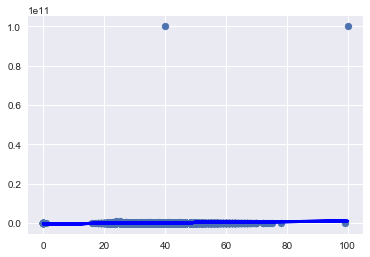

In [38]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
x = Age.reshape(Age.size,1)
y = CompensationAmount
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=3)

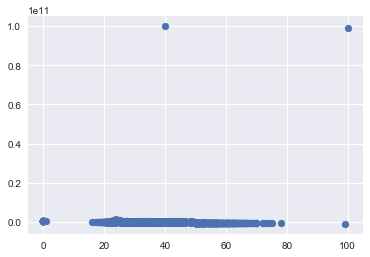

In [39]:
residual = y - y_pred
plt.scatter(x,residual)

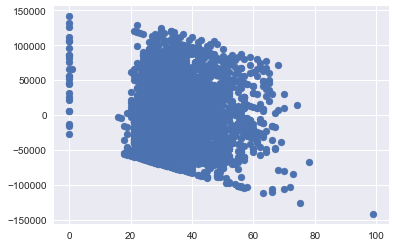

In [40]:
Age = Age[CompensationAmount<200000]
CompensationAmount = CompensationAmount[CompensationAmount<200000]
x = Age[:, np.newaxis]
y = CompensationAmount
reg = LinearRegression()
reg.fit(x,y)
y_pred = reg.predict(x)
residual = y - y_pred
plt.scatter(x,residual)

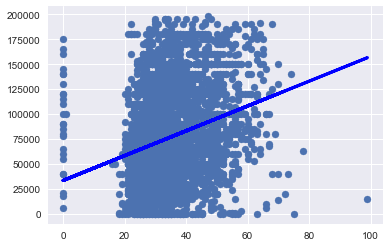

In [41]:
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue', linewidth=3)